# 라이브러리 구동/데이터 불러오기

In [ ]:
# 한글 나눔 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (7,737 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 128208 files and di

haversine은 GPU를 통해 가동해야 함.

In [ ]:
!pip install haversine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import gc

from datetime import datetime
from haversine import haversine

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
PATH = "/content/drive/MyDrive/kubig_ML"

data_info = pd.read_csv(PATH+"/data_info.csv")

In [ ]:
data_info.drop(4,inplace=True) #road_in_use(도로사용여부 변수 제외)
data_info.reset_index(drop=True) # 23개 변수 = 22개의 feature + 1 target

,변수명,변수 설명
0,id,아이디
1,base_date,날짜
2,day_of_week,요일
3,base_hour,시간대
4,lane_count,차로수
5,road_rating,도로등급
6,multi_linked,중용구간 여부
7,connect_code,연결로 코드
8,maximum_speed_limit,최고속도제한
9,weight_restricted,통과제한하중


## csv to parquet
#### -> 메모리에 효율적인 데이터 유형을 사용하여 용량을 크게 줄이고 빠른 작업이 가능합니다.

In [ ]:
def csv_to_parquet(csv_path, save_name):
    df = pd.read_csv(csv_path)
    df.to_parquet(f'./{save_name}.parquet')
    del df
    gc.collect()
    print(save_name, 'Done.')

In [ ]:
csv_to_parquet('/content/drive/MyDrive/kubig_ML/train.csv', 'train')
csv_to_parquet('/content/drive/MyDrive/kubig_ML/test.csv', 'test')

train Done.
test Done.


## 데이터 불러오기

In [ ]:
train = pd.read_parquet('./train.parquet')
test = pd.read_parquet('./test.parquet')

In [ ]:
train.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted,target
0,TRAIN_0000000,20220623,목,17,1,106,지방도1112호선,0,0,60.0,...,3,제3교래교,33.427747,126.662612,없음,제3교래교,33.427749,126.662335,없음,52.0
1,TRAIN_0000001,20220728,목,21,2,103,일반국도11호선,0,0,60.0,...,0,광양사거리,33.500730,126.529107,있음,KAL사거리,33.504811,126.526240,없음,30.0
2,TRAIN_0000002,20211010,일,7,2,103,일반국도16호선,0,0,80.0,...,0,창고천교,33.279145,126.368598,없음,상창육교,33.280072,126.362147,없음,61.0
3,TRAIN_0000003,20220311,금,13,2,107,태평로,0,0,50.0,...,0,남양리조트,33.246081,126.567204,없음,서현주택,33.245565,126.566228,없음,20.0
4,TRAIN_0000004,20211005,화,8,2,103,일반국도12호선,0,0,80.0,...,0,애월샷시,33.462214,126.326551,없음,애월입구,33.462677,126.330152,없음,38.0


In [ ]:
test.head()

,id,base_date,day_of_week,base_hour,lane_count,road_rating,road_name,multi_linked,connect_code,maximum_speed_limit,...,height_restricted,road_type,start_node_name,start_latitude,start_longitude,start_turn_restricted,end_node_name,end_latitude,end_longitude,end_turn_restricted
0,TEST_000000,20220825,목,17,3,107,연삼로,0,0,70.0,...,0.0,0,산지2교,33.499427,126.541298,없음,제주은행사거리,33.500772,126.543837,있음
1,TEST_000001,20220809,화,12,2,103,일반국도12호선,0,0,70.0,...,0.0,3,중문입구,33.258507,126.427003,없음,관광단지입구,33.258119,126.415840,없음
2,TEST_000002,20220805,금,2,1,103,일반국도16호선,0,0,60.0,...,0.0,0,도순3교,33.258960,126.476508,없음,도순2교,33.259206,126.474687,없음
3,TEST_000003,20220818,목,23,3,103,일반국도11호선,0,0,70.0,...,0.0,0,아라주공아파트,33.473494,126.545647,없음,인다마을,33.471061,126.545467,없음
4,TEST_000004,20220810,수,17,3,106,번영로,0,0,70.0,...,0.0,0,부록교 시종점,33.501477,126.569223,없음,봉개교 시종점,33.496863,126.581230,없음


# 데이터 살펴보기 (EDA)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4701217 entries, 0 to 4701216
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   id                     object 
 1   base_date              int64  
 2   day_of_week            object 
 3   base_hour              int64  
 4   lane_count             int64  
 5   road_rating            int64  
 6   road_name              object 
 7   multi_linked           int64  
 8   connect_code           int64  
 9   maximum_speed_limit    float64
 10  vehicle_restricted     float64
 11  weight_restricted      float64
 12  height_restricted      float64
 13  road_type              int64  
 14  start_node_name        object 
 15  start_latitude         float64
 16  start_longitude        float64
 17  start_turn_restricted  object 
 18  end_node_name          object 
 19  end_latitude           float64
 20  end_longitude          float64
 21  end_turn_restricted    object 
 22  target            

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291241 entries, 0 to 291240
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     291241 non-null  object 
 1   base_date              291241 non-null  int64  
 2   day_of_week            291241 non-null  object 
 3   base_hour              291241 non-null  int64  
 4   lane_count             291241 non-null  int64  
 5   road_rating            291241 non-null  int64  
 6   road_name              291241 non-null  object 
 7   multi_linked           291241 non-null  int64  
 8   connect_code           291241 non-null  int64  
 9   maximum_speed_limit    291241 non-null  float64
 10  vehicle_restricted     291241 non-null  float64
 11  weight_restricted      291241 non-null  float64
 12  height_restricted      291241 non-null  float64
 13  road_type              291241 non-null  int64  
 14  start_node_name        291241 non-nu

## 변수별 그래프

In [ ]:
sns.lineplot(x='base_date',y='target',data=train_date,ax=axes[0]).set(title='base_date vs target')
sns.lineplot(x='base_hour',y='target',data=train_time,ax=axes[1]).set(title='base_hour vs target')
sns.lineplot(x='day_of_week',y='target',data=train_day,ax=axes[2]).set(title='day_of_week vs target')

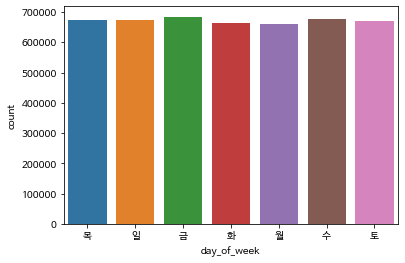

금    684024
수    675583
목    674070
일    673632
토    669767
화    662498
월    661643
Name: day_of_week, dtype: int64


In [ ]:
# 요일
plt.rc('font',family='NanumBarunGothic')
sns.countplot(x="day_of_week",data=train)
plt.show()

print(train["day_of_week"].value_counts())

15    214541
13    214297
14    214182
12    211833
19    209870
11    208515
16    208420
17    208377
18    207500
10    206316
9     205327
20    205059
21    203585
8     201875
22    200629
7     199061
6     189418
23    184229
1     182353
5     181128
2     169322
4     165284
3     155938
0     154158
Name: base_hour, dtype: int64


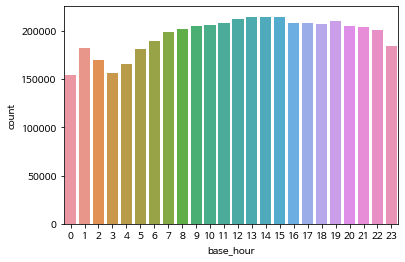

In [ ]:
# 시간대 - train
sns.countplot(x='base_hour',data=train)
print(train['base_hour'].value_counts())

<AxesSubplot:xlabel='base_hour', ylabel='target'>

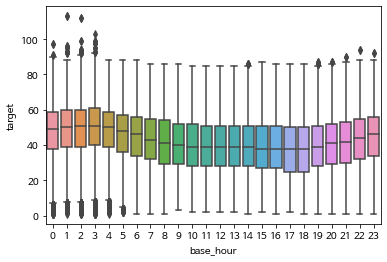

In [ ]:
sns.boxplot(x = train.base_hour, y = train.target)

밤 11시부터 통행량이 감소하다가 6시 이후로 다시 통행량이 증가하는 양상이 확인

<AxesSubplot:xlabel='lane_count', ylabel='count'>

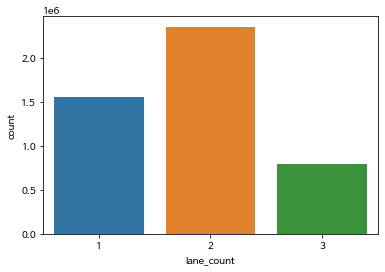

In [ ]:
# lane-count(train)
sns.countplot(x="lane_count",data=train)

<AxesSubplot:xlabel='lane_count', ylabel='count'>

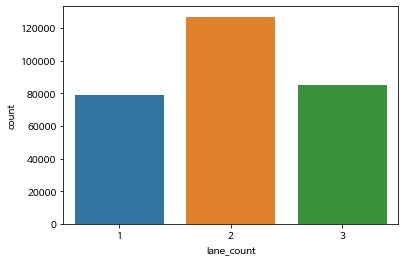

In [ ]:
# lane_count(test)
sns.countplot(x="lane_count",data=test)

<AxesSubplot:xlabel='road_rating', ylabel='count'>

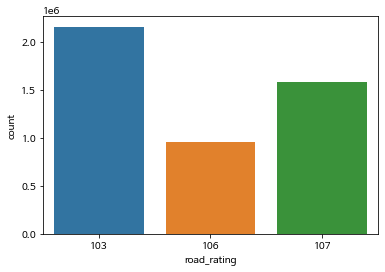

In [ ]:
# road_rating (train)
sns.countplot(x="road_rating",data=train)

<AxesSubplot:xlabel='road_rating', ylabel='count'>

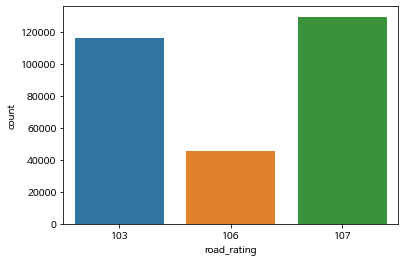

In [ ]:
# road_rating (test)
sns.countplot(x="road_rating",data=test)

In [ ]:
# multi_linked
print(train["multi_linked"].value_counts())
print(test["multi_linked"].value_counts())

0    4698978
1       2239
Name: multi_linked, dtype: int64
0    291241
Name: multi_linked, dtype: int64


In [ ]:
# connect_code
print(train["connect_code"].value_counts())
print(test["connect_code"].value_counts())

0      4689075
103      12142
Name: connect_code, dtype: int64
0    291241
Name: connect_code, dtype: int64


In [ ]:
# vehicle_restricted
print(train["vehicle_restricted"].value_counts())
print(test["vehicle_restricted"].value_counts())

0.0    4701217
Name: vehicle_restricted, dtype: int64
0.0    291241
Name: vehicle_restricted, dtype: int64


In [ ]:
# weight_restricted
print(train["weight_restricted"].value_counts())
print(test["weight_restricted"].value_counts())

0.0        4032874
43200.0     410361
32400.0     239305
50000.0      18677
Name: weight_restricted, dtype: int64
0.0        263267
43200.0     14527
32400.0     13428
50000.0        19
Name: weight_restricted, dtype: int64


In [ ]:
# height_restricted
print(train["height_restricted"].value_counts())
print(test["height_restricted"].value_counts())

0.0    4701217
Name: height_restricted, dtype: int64
0.0    291241
Name: height_restricted, dtype: int64


In [ ]:
# maximum_speed_limit
print(train["maximum_speed_limit"].value_counts())
print(test["maximum_speed_limit"].value_counts())

60.0    1665573
50.0    1103682
70.0     995077
80.0     700334
30.0     229761
40.0       6790
Name: maximum_speed_limit, dtype: int64
60.0    108606
70.0     80356
50.0     71315
30.0     21350
80.0      9614
Name: maximum_speed_limit, dtype: int64


<AxesSubplot:xlabel='maximum_speed_limit', ylabel='target'>

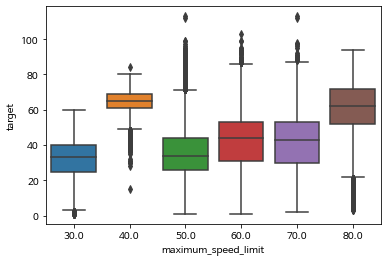

In [ ]:
sns.boxplot(x = "maximum_speed_limit", y = "target", data = train)

최대 제한 속도에 따라 평균 값의 차이가 다른 것이 확인됩니다.

In [ ]:
# road_type
print(train["road_type"].value_counts())
print(test["road_type"].value_counts())

0    3737117
3     964100
Name: road_type, dtype: int64
0    229610
3     61631
Name: road_type, dtype: int64


In [ ]:
len(train["road_name"].values)

4701217

In [ ]:
# start_turn_restricted
print(train["start_turn_restricted"].value_counts())
print(test["start_turn_restricted"].value_counts())

없음    4239701
있음     461516
Name: start_turn_restricted, dtype: int64
없음    246968
있음     44273
Name: start_turn_restricted, dtype: int64


In [ ]:
# end-turn_restricted
print(train["end_turn_restricted"].value_counts())
print(test["end_turn_restricted"].value_counts())

없음    4239599
있음     461618
Name: end_turn_restricted, dtype: int64
없음    246953
있음     44288
Name: end_turn_restricted, dtype: int64


(array([1.42080e+04, 1.28352e+05, 4.50032e+05, 5.89034e+05, 7.66732e+05,
       6.55615e+05, 8.59529e+05, 6.00714e+05, 3.39307e+05, 1.89761e+05,
       1.02010e+05, 5.86400e+03, 5.00000e+01, 5.00000e+00, 4.00000e+00]), array([  1.        ,   8.46666667,  15.93333333,  23.4       ,
        30.86666667,  38.33333333,  45.8       ,  53.26666667,
        60.73333333,  68.2       ,  75.66666667,  83.13333333,
        90.6       ,  98.06666667, 105.53333333, 113.        ]), <BarContainer object of 15 artists>)


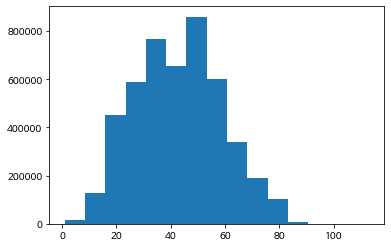

In [ ]:
# target
print(plt.hist(train["target"],bins=15))

## 상관계수 확인

                       day_of_week  base_hour  lane_count  road_rating  \
day_of_week               1.000000  -0.001876    0.001190    -0.001027   
base_hour                -0.001876   1.000000   -0.029328     0.034059   
lane_count                0.001190  -0.029328    1.000000    -0.090003   
road_rating              -0.001027   0.034059   -0.090003     1.000000   
road_name                 0.000690  -0.029350   -0.007059    -0.464344   
maximum_speed_limit       0.000747  -0.036983    0.382178    -0.355392   
weight_restricted        -0.000018  -0.004234   -0.159567    -0.126017   
road_type                 0.000020  -0.007922   -0.051673    -0.148111   
start_node_name           0.000046   0.004772   -0.060898    -0.012566   
start_latitude            0.000363  -0.021572    0.183973    -0.238848   
start_longitude           0.000118  -0.011552   -0.096560    -0.028086   
start_turn_restricted     0.000679  -0.012508    0.292608    -0.042957   
end_node_name             0.000168   0

<AxesSubplot:>

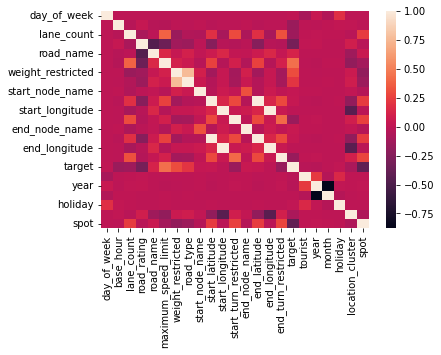

In [ ]:
print(train.corr())
sns.heatmap(train.corr())

# 데이터 전처리

##결측치 확인

In [ ]:
train.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
target                   0
dtype: int64

In [ ]:
test.isnull().sum()

id                       0
base_date                0
day_of_week              0
base_hour                0
lane_count               0
road_rating              0
road_name                0
multi_linked             0
connect_code             0
maximum_speed_limit      0
vehicle_restricted       0
weight_restricted        0
height_restricted        0
road_type                0
start_node_name          0
start_latitude           0
start_longitude          0
start_turn_restricted    0
end_node_name            0
end_latitude             0
end_longitude            0
end_turn_restricted      0
dtype: int64

결측치는 없습니다.

## 불필요 변수 삭제

In [ ]:
train.drop(['vehicle_restricted', 'id', 'height_restricted', 'multi_linked', 'connect_code'], axis = 1, inplace = True)
test.drop(['vehicle_restricted', 'id', 'height_restricted', 'multi_linked', 'connect_code'], axis = 1, inplace = True)

##시간대 나누기

In [ ]:
# 주말에는 근무를 하지 않는 곳이 많지만 어딘가에 가는 것도 휴식시간이 아닌 경우가 있기 때문에 일괄적인 시간을 기준으로 값을 나눴습니다.
def set_binned_time(x):
    if 8 <= x <= 20:
        time = "worktime"
    elif x >= 21:
        time = "resttime"
    elif x <=7:
        time = "resttime"
    else: # 0 ~ 24 이외에 다른 값이 적용된 경우
        time = None
    return time

train["time"] = train["base_hour"].apply(set_binned_time)
test["time"] = test["base_hour"].apply(set_binned_time)

##일자별 관광객 현황 변수 추가: "tourist"

In [ ]:
tourist = pd.read_csv(PATH+"/tourist.csv")
tourist.head()

,base_date,tourist
0,20210901,27100
1,20210902,25474
2,20210903,29808
3,20210904,29731
4,20210905,27683


In [ ]:
#train/test와 tourist를 합쳐줌
train = train.merge(tourist[['base_date', 'tourist']], how='left', on=['base_date'])
test = test.merge(tourist[['base_date', 'tourist']], how='left', on=['base_date'])

##'base_date'(날짜) 전처리

In [ ]:
# 날짜
# 연/일/월 파생변수 생성
train["base_date"] = pd.to_datetime(train["base_date"],format='%Y%m%d')
train['year']= train['base_date'].dt.year     # 데이터를 2021, 2022 구분
train['month']= train['base_date'].dt.month   # 데이터를 월별로 구분(4, 8월 데이터 없음)
train['day']= train['base_date'].dt.day       # 데이터를 일자(31일)별로 구분

# 날짜
# 연/일/월 파생변수 생성
test["base_date"] = pd.to_datetime(test["base_date"],format='%Y%m%d')
test['year']= test['base_date'].dt.year     # 데이터를 2021, 2022 구분
test['month']= test['base_date'].dt.month   # 데이터를 월별로 구분(4, 8월 데이터 없음)
test['day']= test['base_date'].dt.day       # 데이터를 일자(31일)별로 구분

train.drop(columns="base_date",inplace=True)
test.drop(columns="base_date",inplace=True)

##season

In [ ]:
def group_season(df): # O
    df['season'] = '-'
    df.loc[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5), 'season'] = '봄'
    df.loc[(df['month'] == 6) | (df['month'] == 7) | (df['month'] == 8), 'season'] = '여름'
    df.loc[(df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11), 'season'] = '가을'
    df.loc[(df['month'] == 12) | (df['month'] == 1) | (df['month'] == 2), 'season'] = '겨울'
    df.loc[(df['season']=='-'), 'season'] = 'Na'
    return df['season']

train['season'] = group_season(train)
test['season'] = group_season(test)

##vacation

In [ ]:
def vacation(df): # O
    df['vacation'] = '-'
    df.loc[(df['month'] == 7) | (df['month'] == 8) | (df['month'] == 1) | (df['month'] == 2), 'vacation'] = 'vacation'
    df.loc[(df['month'] == 3) | (df['month'] == 4) | (df['month'] == 5) | (df['month'] == 6) |
           (df['month'] == 9) | (df['month'] == 10) | (df['month'] == 11) | (df['month'] == 12), 'vacation'] = 'semester'
    df.loc[(df['vacation']=='-'), 'vacation'] = 'Na'
    return df['vacation']

train['vacation'] = vacation(train)
test['vacation'] = vacation(test)

## 'start_turn_restricted', 'end_turn_restricted' : 0,1로 encoding

In [ ]:
train['start_turn_restricted']=train['start_turn_restricted'].replace(['있음','없음'],[1,0])
train['end_turn_restricted']=train['end_turn_restricted'].replace(['있음','없음'],[1,0])

test['start_turn_restricted']=test['start_turn_restricted'].replace(['있음','없음'],[1,0])
test['end_turn_restricted']=test['end_turn_restricted'].replace(['있음','없음'],[1,0])

##turn_restricted

In [ ]:
def turn_restricted(df): # O
    df['turn_restricted'] = df['start_turn_restricted'] + df['end_turn_restricted']

    return df['turn_restricted']

train['turn_restricted'] = turn_restricted(train)
test['turn_restricted'] = turn_restricted(test)

## 파생변수 : 공휴일 변수 'holiday' 추가

In [ ]:
# 공휴일 파생변수(외부 데이터)
holiday = pd.read_csv(PATH+"/holiday.csv")
holiday

,year,month,day,is_holiday
0,2021,1,1,1
1,2021,2,11,1
2,2021,2,12,1
3,2021,2,13,1
4,2021,3,1,1
5,2021,5,5,1
6,2021,5,19,1
7,2021,6,6,1
8,2021,8,15,1
9,2021,8,16,1


In [ ]:
# holiday와 train 합쳐주기(left_join)
train = train.merge(holiday[['year', 'month', 'day','is_holiday']], how='left', on=['year', 'month','day'])
train['is_holiday']=train['is_holiday'].fillna(0)

In [ ]:
# 주말 여부 추가하여 최종 holiday라는 공휴일 파생변수 생성
def create_time_features(data):

    tmp = data.copy()
    tmp['weekend'] = tmp['day_of_week'].map({"월":0, "화":0, "수":0, "목":0, "금":0, "토":1, "일":1})
    tmp['holiday'] = (tmp['weekend'] + tmp['is_holiday']).map({0:0, 1:1, 2:1})
    tmp = tmp.drop(['weekend', 'is_holiday'], axis=1)
    return tmp

train = create_time_features(train)

In [ ]:
# test data에 적용
test = test.merge(holiday[['year', 'month', 'day','is_holiday']], how='left', on=['year', 'month','day'])
test['is_holiday']=test['is_holiday'].fillna(0)
test = create_time_features(test)

##'day' 변수 삭제

In [ ]:
train=train.drop(columns='day')
test=test.drop(columns='day')

## 'day_of_week' : 0,1,2,3,4,5,6 으로 encoding

In [ ]:
#목~일 요일 라벨이 큰 차이 나지 않도록 수요일부터 0으로 설정
train['day_of_week']=train['day_of_week'].map({"수":0,"목":1,"금":2,"토":3,"일":4,"월":5,"화":6})
test['day_of_week']=test['day_of_week'].map({"수":0,"목":1,"금":2,"토":3,"일":4,"월":5,"화":6})


## 'road_name' ,'start_node_name', 'end_node_name', 'road_rating', 'weight_restricted', 'road_type' : label encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

items =  ['road_name', 'start_node_name','end_node_name','road_rating', 'weight_restricted','road_type']
encoder = LabelEncoder()

for i in items:
    encoder.fit(train[i])
    train[i] = encoder.transform(train[i])
    test[i]=encoder.transform(test[i])


##distance

In [ ]:
def make_dist(df): # 0
    start_location = tuple(zip(df['start_latitude'], df['start_longitude']))
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(s, e) for s, e in zip(start_location, end_location)]

    return hsine

train['distance'] = make_dist(train)
test['distance'] = make_dist(test)

##maximum_speed_limit 이상치 처리

In [ ]:
train = train[train['maximum_speed_limit'] != 40]

## 제주공항 변수 추가

In [ ]:
# 제주 공항으로 부터의 거리를 L1, L2 로 구하여 feature로 추가
# 제주공항 gps : 33.510752, 126.492199
train['distance_from_airport_square'] = (train['end_latitude'] - 33.510752)**2 + (train['end_longitude'] - 126.492199)**2
train['distance_from_airport_abs'] = abs((train['end_latitude'] - 33.510752)) + abs((train['end_longitude'] - 126.492199))
test['distance_from_airport_square'] = (test['end_latitude'] - 33.510752)**2 + (test['end_longitude'] - 126.492199)**2
test['distance_from_airport_abs'] = abs((test['end_latitude'] - 33.510752)) + abs((test['end_longitude'] - 126.492199))

# 제주공항에서의 위도, 경도 차이 추가
train['latitude_from_airport'] = train['end_latitude'] - 33.510752
train['longitude_from_airport'] = train['end_longitude'] - 126.492199
test['latitude_from_airport'] = test['end_latitude'] - 33.510752
test['longitude_from_airport'] = test['end_longitude'] - 126.492199

##jeju_city

In [ ]:
def jeju_dist(df):
    jeju_location = (33.4996213, 126.5311884)
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(i, jeju_location) for i in end_location]
    return hsine

train['jeju_dist'] = jeju_dist(train)
test['jeju_dist'] = jeju_dist(test)

##seogwi_city

In [ ]:
def seogwi_dist(df):
    jeju_location = (33.2541205, 126.560076)
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(i, jeju_location) for i in end_location]

    return hsine

train['seogwi_dist'] = seogwi_dist(train)
test['seogwi_dist'] = seogwi_dist(test)

##Other Places

In [ ]:
def hanra_dist(df):
    jeju_location = (33.361417, 126.529417)
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(i, jeju_location) for i in end_location]

    return hsine


def sungsan_dist(df):
    jeju_location = (33.458528, 126.94225)
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(i, jeju_location) for i in end_location]

    return hsine


def joongmoon_dist(df):
    jeju_location = (33.246340915095914, 126.41973291093717)
    end_location = tuple(zip(df['end_latitude'], df['end_longitude']))
    hsine = [haversine(i, jeju_location) for i in end_location]

    return hsine

train['hanra_dist'] = hanra_dist(train)
train['sungsan_dist'] = sungsan_dist(train)
train['joongmoon_dist'] = joongmoon_dist(train)

test['hanra_dist'] = hanra_dist(test)
test['sungsan_dist'] = sungsan_dist(test)
test['joongmoon_dist'] = joongmoon_dist(test)

##추가 labelencoding

In [ ]:
str_col = ['time','season','vacation']

for i in str_col:
  le = LabelEncoder()
  le = le.fit(train[i])
  train[i] = le.transform(train[i])

  for label in np.unique(test[i]):
    if label not in le.classes_:
      le.classes_ = np.append(le.classes_, label)
  test[i] = le.transform(test[i])

## clustering

In [ ]:
from sklearn.cluster import KMeans

def make_cluster(train, test):
    train_c = train[['start_latitude', 'start_longitude']]
    test_c = test[['start_latitude', 'start_longitude']]
    cluster_centers = np.array([[33.26345514655621116162365069612860679626464843, 126.5203815031463392415389535017311573028564453], [33.37082277149481512878992361947894096374511718, 126.2976713570606790426609222777187824249267578], [33.48077890914120757770433556288480758666992187, 126.4946717292079512162672472186386585235595703] , [33.41815597422977646147046471014618873596191406, 126.7739831436176700663054361939430236816406250]])

    k_mean = KMeans(n_clusters=4, init=cluster_centers,random_state=42)
    train['location_cluster'] = k_mean.fit_predict(train_c)
    test['location_cluster'] = k_mean.predict(test_c)
    
    return train, test  

train,test = make_cluster(train,test)

/usr/local/lib/python3.8/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


# 모델 선언 및 학습

In [ ]:
train_prep = train.copy()
test_prep = test.copy()

In [ ]:
X = train_prep.drop('target', axis=1)
y = train_prep['target'] 

print(X.shape)
print(y.shape)
print(test_prep.shape)

(4694427, 35)
(4694427,)
(291241, 35)


RandomForest, XGboost, LGBM 총 3가지 baseline 모델을 돌려보았다.

##RandomForestRegressor

In [ ]:
#baseline RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=42)

model_rf=RandomForestRegressor(random_state=42)
model_rf.fit(X_train,y_train)

y_pred=model_rf.predict(X_val)
mae(y_val,y_pred)

2.866205726786853

*   Overfitting
*   실행 시간 최소 1시간 이상 (너무 오래 걸림)



##XGBRegressor

In [ ]:
#baseline XGBRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=42)

model_xgb=XGBRegressor(random_state=42)
model_xgb.fit(X_train,y_train)

y_pred=model_xgb.predict(X_val)
mae(y_val,y_pred)

[20:38:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:38:41] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


6.306167829368431

성능이 별로 좋지 않다. (실행 시간 약 35분)

##LGBMRegressor

In [ ]:
#baseline LGBMRegressor
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=42)

model_lgbmR=LGBMRegressor(random_state=42)
model_lgbmR.fit(X_train,y_train)

y_pred=model_lgbmR.predict(X_val)
mae(y_val,y_pred)


4.453670203131853

적절한 hyperparameter tuning을 통해 성능을 높일 수 있을 것으로 기대된다.\
실행 시간도 가장 빠르다.

##하이퍼파라미터 튜닝

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.5/210.5 KB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 10.1 MB/s eta 0:00:00


In [ ]:
from lightgbm import LGBMRegressor

In [ ]:
import optuna
from optuna import Trial, visualization
from optuna.samplers import TPESampler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

def objectiveLGB(trial, X, y):
    param = {
        'boosting_type' : 'gbdt',
        "n_estimators": trial.suggest_int('n_estimators', 1000, 10000),
        'max_depth':trial.suggest_int('max_depth', 4, 15),
        'random_state': 42,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 8, 32),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 16, 100),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.01, 0.3)
    }
    X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.1,random_state=42)
    lgb = LGBMRegressor(**param)

    lgb.fit(X_train, y_train,
                eval_set=(X_val,y_val),
                eval_metric='mae', verbose=100, early_stopping_rounds=100)

    pred = lgb.predict(X_val)
    score = mae(pred,y_val)

    return score

In [ ]:
# Optuna study 진행
study = optuna.create_study(direction='minimize',sampler=TPESampler(seed=42))
study.optimize(lambda trial : objectiveLGB(trial, X, y), n_trials=10)
print('Best trial: score {},\nparams {}'.format(study.best_trial.value,study.best_trial.params))

[I 2023-03-01 05:56:14,549] A new study created in memory with name: no-name-a9bbf008-9d37-4474-b892-897257d45439
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` in

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 42.032	valid_0's l1: 4.92408
[200]	valid_0's l2: 34.6905	valid_0's l1: 4.4043
[300]	valid_0's l2: 31.0822	valid_0's l1: 4.11825
[400]	valid_0's l2: 28.9375	valid_0's l1: 3.94433
[500]	valid_0's l2: 27.565	valid_0's l1: 3.83071
[600]	valid_0's l2: 26.6275	valid_0's l1: 3.75248
[700]	valid_0's l2: 25.869	valid_0's l1: 3.68251
[800]	valid_0's l2: 25.1962	valid_0's l1: 3.62217
[900]	valid_0's l2: 24.6745	valid_0's l1: 3.57443
[1000]	valid_0's l2: 24.2304	valid_0's l1: 3.5357
[1100]	valid_0's l2: 23.8427	valid_0's l1: 3.50079
[1200]	valid_0's l2: 23.5504	valid_0's l1: 3.47154
[1300]	valid_0's l2: 23.3103	valid_0's l1: 3.45026
[1400]	valid_0's l2: 23.0632	valid_0's l1: 3.42589
[1500]	valid_0's l2: 22.8292	valid_0's l1: 3.40245
[1600]	valid_0's l2: 22.6665	valid_0's l1: 3.38547
[1700]	valid_0's l2: 22.5021	valid_0's l1: 3.36863
[1800]	valid_0's l2: 22.3572	valid_0's l1: 3.35451
[1900]	valid_0's l2: 22.223	valid

[I 2023-03-01 06:06:43,852] Trial 0 finished with value: 3.1758819731750747 and parameters: {'n_estimators': 4371, 'max_depth': 15, 'reg_alpha': 0.038720902953704193, 'reg_lambda': 0.0024430162614261413, 'num_leaves': 11, 'colsample_bytree': 0.5779972601681014, 'subsample': 0.5290418060840998, 'min_child_samples': 89, 'learning_rate': 0.18432335340553055}. Best is trial 0 with value: 3.1758819731750747.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': tri

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 45.2916	valid_0's l1: 5.11916
[200]	valid_0's l2: 37.0207	valid_0's l1: 4.55826
[300]	valid_0's l2: 33.2405	valid_0's l1: 4.27082
[400]	valid_0's l2: 31.0321	valid_0's l1: 4.09109
[500]	valid_0's l2: 29.5428	valid_0's l1: 3.96898
[600]	valid_0's l2: 28.4305	valid_0's l1: 3.87516
[700]	valid_0's l2: 27.567	valid_0's l1: 3.80101
[800]	valid_0's l2: 26.8922	valid_0's l1: 3.74159
[900]	valid_0's l2: 26.2709	valid_0's l1: 3.68937
[1000]	valid_0's l2: 25.8441	valid_0's l1: 3.65168
[1100]	valid_0's l2: 25.4612	valid_0's l1: 3.6179
[1200]	valid_0's l2: 25.1283	valid_0's l1: 3.58692
[1300]	valid_0's l2: 24.8514	valid_0's l1: 3.56291
[1400]	valid_0's l2: 24.5977	valid_0's l1: 3.5393
[1500]	valid_0's l2: 24.3705	valid_0's l1: 3.51839
[1600]	valid_0's l2: 24.1545	valid_0's l1: 3.49918
[1700]	valid_0's l2: 23.9529	valid_0's l1: 3.48039
[1800]	valid_0's l2: 23.776	valid_0's l1: 3.46574
[1900]	valid_0's l2: 23.6088	val

[I 2023-03-01 06:27:32,094] Trial 1 finished with value: 3.2005316013692524 and parameters: {'n_estimators': 7373, 'max_depth': 4, 'reg_alpha': 5.360294728728285, 'reg_lambda': 0.31044435499483225, 'num_leaves': 13, 'colsample_bytree': 0.5909124836035503, 'subsample': 0.5917022549267169, 'min_child_samples': 41, 'learning_rate': 0.16217936517334897}. Best is trial 0 with value: 3.1758819731750747.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial.sug

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 51.5575	valid_0's l1: 5.52777
[200]	valid_0's l2: 42.1539	valid_0's l1: 4.93517
[300]	valid_0's l2: 37.3044	valid_0's l1: 4.59718
[400]	valid_0's l2: 34.4366	valid_0's l1: 4.38738
[500]	valid_0's l2: 32.5594	valid_0's l1: 4.24367
[600]	valid_0's l2: 31.0037	valid_0's l1: 4.12022
[700]	valid_0's l2: 29.9459	valid_0's l1: 4.03592
[800]	valid_0's l2: 28.9914	valid_0's l1: 3.9566
[900]	valid_0's l2: 28.2033	valid_0's l1: 3.88969
[1000]	valid_0's l2: 27.5181	valid_0's l1: 3.83375
[1100]	valid_0's l2: 26.9627	valid_0's l1: 3.78688
[1200]	valid_0's l2: 26.4724	valid_0's l1: 3.74365
[1300]	valid_0's l2: 26.0394	valid_0's l1: 3.70453
[1400]	valid_0's l2: 25.6738	valid_0's l1: 3.67006
[1500]	valid_0's l2: 25.3344	valid_0's l1: 3.63844
[1600]	valid_0's l2: 25.051	valid_0's l1: 3.61139
[1700]	valid_0's l2: 24.7776	valid_0's l1: 3.58642
[1800]	valid_0's l2: 24.5435	valid_0's l1: 3.56495
[1900]	valid_0's l2: 24.317	va

[I 2023-03-01 06:41:06,379] Trial 2 finished with value: 3.268563024100648 and parameters: {'n_estimators': 4887, 'max_depth': 7, 'reg_alpha': 0.0032112643094417484, 'reg_lambda': 1.8007140198129195e-07, 'num_leaves': 15, 'colsample_bytree': 0.6831809216468459, 'subsample': 0.728034992108518, 'min_child_samples': 82, 'learning_rate': 0.06790539682592432}. Best is trial 0 with value: 3.1758819731750747.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': tria

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 38.3877	valid_0's l1: 4.67982
[200]	valid_0's l2: 31.4514	valid_0's l1: 4.16075
[300]	valid_0's l2: 28.7061	valid_0's l1: 3.93076
[400]	valid_0's l2: 27.0564	valid_0's l1: 3.78977
[500]	valid_0's l2: 25.8631	valid_0's l1: 3.68696
[600]	valid_0's l2: 24.9711	valid_0's l1: 3.60338
[700]	valid_0's l2: 24.4413	valid_0's l1: 3.55436
[800]	valid_0's l2: 23.9643	valid_0's l1: 3.50983
[900]	valid_0's l2: 23.564	valid_0's l1: 3.47252
[1000]	valid_0's l2: 23.1946	valid_0's l1: 3.43716
[1100]	valid_0's l2: 22.8507	valid_0's l1: 3.40439
[1200]	valid_0's l2: 22.5585	valid_0's l1: 3.37732
[1300]	valid_0's l2: 22.3577	valid_0's l1: 3.3581
[1400]	valid_0's l2: 22.1733	valid_0's l1: 3.33914
[1500]	valid_0's l2: 22.0156	valid_0's l1: 3.32321
[1600]	valid_0's l2: 21.8678	valid_0's l1: 3.30806
[1700]	valid_0's l2: 21.7195	valid_0's l1: 3.29389
[1800]	valid_0's l2: 21.5914	valid_0's l1: 3.2808
[1900]	valid_0's l2: 21.4809	va

[I 2023-03-01 06:53:32,973] Trial 3 finished with value: 3.1024221794434257 and parameters: {'n_estimators': 5628, 'max_depth': 11, 'reg_alpha': 2.6185068507773707e-08, 'reg_lambda': 0.0029369981104377003, 'num_leaves': 12, 'colsample_bytree': 0.5325257964926398, 'subsample': 0.9744427686266666, 'min_child_samples': 98, 'learning_rate': 0.24443523095377373}. Best is trial 3 with value: 3.1024221794434257.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': t

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 54.9986	valid_0's l1: 5.69484
[200]	valid_0's l2: 44.6334	valid_0's l1: 5.07852
[300]	valid_0's l2: 39.6058	valid_0's l1: 4.75117
[400]	valid_0's l2: 36.2945	valid_0's l1: 4.51785
[500]	valid_0's l2: 34.1017	valid_0's l1: 4.3551
[600]	valid_0's l2: 32.5374	valid_0's l1: 4.23243
[700]	valid_0's l2: 31.3768	valid_0's l1: 4.13684
[800]	valid_0's l2: 30.3629	valid_0's l1: 4.0577
[900]	valid_0's l2: 29.5606	valid_0's l1: 3.99053
[1000]	valid_0's l2: 28.8446	valid_0's l1: 3.93312
[1100]	valid_0's l2: 28.1684	valid_0's l1: 3.87992
[1200]	valid_0's l2: 27.5917	valid_0's l1: 3.82934
[1300]	valid_0's l2: 27.1502	valid_0's l1: 3.79016
[1400]	valid_0's l2: 26.7349	valid_0's l1: 3.75344
[1500]	valid_0's l2: 26.3529	valid_0's l1: 3.71906
[1600]	valid_0's l2: 26.0594	valid_0's l1: 3.69209
[1700]	valid_0's l2: 25.7816	valid_0's l1: 3.6678
[1800]	valid_0's l2: 25.5347	valid_0's l1: 3.64449
[1900]	valid_0's l2: 25.2926	va

[I 2023-03-01 07:04:09,408] Trial 4 finished with value: 3.4015371137286365 and parameters: {'n_estimators': 3741, 'max_depth': 5, 'reg_alpha': 0.014391207615728067, 'reg_lambda': 9.148975058772307e-05, 'num_leaves': 11, 'colsample_bytree': 0.7475884550556351, 'subsample': 0.5171942605576092, 'min_child_samples': 93, 'learning_rate': 0.0850461946640049}. Best is trial 3 with value: 3.1024221794434257.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 36.6413	valid_0's l1: 4.54345
[200]	valid_0's l2: 30.1602	valid_0's l1: 4.04792
[300]	valid_0's l2: 27.3173	valid_0's l1: 3.81101
[400]	valid_0's l2: 25.7363	valid_0's l1: 3.66931
[500]	valid_0's l2: 24.7913	valid_0's l1: 3.58413
[600]	valid_0's l2: 24.1362	valid_0's l1: 3.52568
[700]	valid_0's l2: 23.6076	valid_0's l1: 3.47622
[800]	valid_0's l2: 23.1412	valid_0's l1: 3.43332
[900]	valid_0's l2: 22.7628	valid_0's l1: 3.39571
[1000]	valid_0's l2: 22.4698	valid_0's l1: 3.36617
[1100]	valid_0's l2: 22.2223	valid_0's l1: 3.34162
[1200]	valid_0's l2: 22.0144	valid_0's l1: 3.32115
[1300]	valid_0's l2: 21.8207	valid_0's l1: 3.30076
[1400]	valid_0's l2: 21.6185	valid_0's l1: 3.28086
[1500]	valid_0's l2: 21.4653	valid_0's l1: 3.26595
[1600]	valid_0's l2: 21.3395	valid_0's l1: 3.25365
[1700]	valid_0's l2: 21.2307	valid_0's l1: 3.24315
[1800]	valid_0's l2: 21.1253	valid_0's l1: 3.23226
[1900]	valid_0's l2: 21.029	

[I 2023-03-01 07:25:35,290] Trial 5 finished with value: 3.0499734245182255 and parameters: {'n_estimators': 6963, 'max_depth': 7, 'reg_alpha': 0.0004793052550782129, 'reg_lambda': 0.0008325158565947976, 'num_leaves': 12, 'colsample_bytree': 0.9847923138822793, 'subsample': 0.8875664116805573, 'min_child_samples': 95, 'learning_rate': 0.26949993162401814}. Best is trial 5 with value: 3.0499734245182255.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': tri

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 41.8391	valid_0's l1: 4.91568
[200]	valid_0's l2: 33.9995	valid_0's l1: 4.35533
[300]	valid_0's l2: 30.7287	valid_0's l1: 4.0861
[400]	valid_0's l2: 28.6812	valid_0's l1: 3.91802
[500]	valid_0's l2: 27.1814	valid_0's l1: 3.79404
[600]	valid_0's l2: 26.2517	valid_0's l1: 3.71284
[700]	valid_0's l2: 25.4879	valid_0's l1: 3.64853
[800]	valid_0's l2: 24.8505	valid_0's l1: 3.59391
[900]	valid_0's l2: 24.3552	valid_0's l1: 3.54545
[1000]	valid_0's l2: 23.984	valid_0's l1: 3.50814
[1100]	valid_0's l2: 23.6154	valid_0's l1: 3.47527
[1200]	valid_0's l2: 23.3162	valid_0's l1: 3.44712
[1300]	valid_0's l2: 23.091	valid_0's l1: 3.42475
[1400]	valid_0's l2: 22.8623	valid_0's l1: 3.40335
[1500]	valid_0's l2: 22.668	valid_0's l1: 3.38343
[1600]	valid_0's l2: 22.4793	valid_0's l1: 3.36535
[1700]	valid_0's l2: 22.3271	valid_0's l1: 3.35143
[1800]	valid_0's l2: 22.1854	valid_0's l1: 3.33825
[1900]	valid_0's l2: 22.0499	val

[I 2023-03-01 07:41:31,991] Trial 6 finished with value: 3.118202679007263 and parameters: {'n_estimators': 6381, 'max_depth': 15, 'reg_alpha': 6.257956190096665e-08, 'reg_lambda': 5.805581976088804e-07, 'num_leaves': 9, 'colsample_bytree': 0.6626651653816322, 'subsample': 0.6943386448447411, 'min_child_samples': 39, 'learning_rate': 0.2503338776540595}. Best is trial 5 with value: 3.0499734245182255.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 43.6303	valid_0's l1: 5.02789
[200]	valid_0's l2: 35.4191	valid_0's l1: 4.46272
[300]	valid_0's l2: 31.6083	valid_0's l1: 4.16874
[400]	valid_0's l2: 29.603	valid_0's l1: 3.99773
[500]	valid_0's l2: 28.1376	valid_0's l1: 3.87584
[600]	valid_0's l2: 27.0244	valid_0's l1: 3.77993
[700]	valid_0's l2: 26.1455	valid_0's l1: 3.70365
[800]	valid_0's l2: 25.5154	valid_0's l1: 3.64934
[900]	valid_0's l2: 24.9169	valid_0's l1: 3.59708
[1000]	valid_0's l2: 24.5533	valid_0's l1: 3.56314
[1100]	valid_0's l2: 24.2106	valid_0's l1: 3.53124
[1200]	valid_0's l2: 23.8826	valid_0's l1: 3.50031
[1300]	valid_0's l2: 23.6121	valid_0's l1: 3.4733
[1400]	valid_0's l2: 23.3716	valid_0's l1: 3.45113
[1500]	valid_0's l2: 23.1627	valid_0's l1: 3.43049
[1600]	valid_0's l2: 22.9492	valid_0's l1: 3.40939
[1700]	valid_0's l2: 22.7871	valid_0's l1: 3.3935
[1800]	valid_0's l2: 22.6253	valid_0's l1: 3.37798
[1900]	valid_0's l2: 22.4775	va

[I 2023-03-01 07:53:22,364] Trial 7 finished with value: 3.1991989987050666 and parameters: {'n_estimators': 4211, 'max_depth': 7, 'reg_alpha': 0.0007660634613082914, 'reg_lambda': 1.8548894229694903e-07, 'num_leaves': 28, 'colsample_bytree': 0.5372753218398854, 'subsample': 0.9934434683002586, 'min_child_samples': 81, 'learning_rate': 0.06762754764491}. Best is trial 5 with value: 3.0499734245182255.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 29.0507	valid_0's l1: 3.96116
[200]	valid_0's l2: 25.2869	valid_0's l1: 3.64189
[300]	valid_0's l2: 23.6976	valid_0's l1: 3.49252
[400]	valid_0's l2: 22.8894	valid_0's l1: 3.41579
[500]	valid_0's l2: 22.3056	valid_0's l1: 3.35587
[600]	valid_0's l2: 21.8882	valid_0's l1: 3.31535
[700]	valid_0's l2: 21.5344	valid_0's l1: 3.2788
[800]	valid_0's l2: 21.2089	valid_0's l1: 3.24636
[900]	valid_0's l2: 20.9691	valid_0's l1: 3.22281
[1000]	valid_0's l2: 20.789	valid_0's l1: 3.20425
Did not meet early stopping. Best iteration is:
[1049]	valid_0's l2: 20.7153	valid_0's l1: 3.19699


[I 2023-03-01 07:56:21,898] Trial 8 finished with value: 3.1969947344147007 and parameters: {'n_estimators': 1049, 'max_depth': 13, 'reg_alpha': 0.022999378190815954, 'reg_lambda': 0.03639690979811287, 'num_leaves': 27, 'colsample_bytree': 0.5370223258670452, 'subsample': 0.6792328642721364, 'min_child_samples': 25, 'learning_rate': 0.26029999350392213}. Best is trial 5 with value: 3.0499734245182255.
<ipython-input-38-c6633ca4b228>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 10.0),
<ipython-input-38-c6633ca4b228>:15: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  'reg_lambda': trial

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's l2: 40.0121	valid_0's l1: 4.77891
[200]	valid_0's l2: 32.6771	valid_0's l1: 4.25306
[300]	valid_0's l2: 29.4273	valid_0's l1: 3.99066
[400]	valid_0's l2: 27.6062	valid_0's l1: 3.84076
[500]	valid_0's l2: 26.1881	valid_0's l1: 3.71823
[600]	valid_0's l2: 25.2839	valid_0's l1: 3.63521
[700]	valid_0's l2: 24.6026	valid_0's l1: 3.57347
[800]	valid_0's l2: 24.092	valid_0's l1: 3.52407
[900]	valid_0's l2: 23.7066	valid_0's l1: 3.48785
[1000]	valid_0's l2: 23.3376	valid_0's l1: 3.4516
[1100]	valid_0's l2: 23.0125	valid_0's l1: 3.4209
[1200]	valid_0's l2: 22.7556	valid_0's l1: 3.39513
[1300]	valid_0's l2: 22.5393	valid_0's l1: 3.37342
[1400]	valid_0's l2: 22.3332	valid_0's l1: 3.35372
[1500]	valid_0's l2: 22.1522	valid_0's l1: 3.33542
[1600]	valid_0's l2: 22.0013	valid_0's l1: 3.31979
[1700]	valid_0's l2: 21.8546	valid_0's l1: 3.30522
[1800]	valid_0's l2: 21.722	valid_0's l1: 3.29289
[1900]	valid_0's l2: 21.6039	val

[I 2023-03-01 08:16:26,387] Trial 9 finished with value: 3.0800626201672983 and parameters: {'n_estimators': 6610, 'max_depth': 7, 'reg_alpha': 3.732717755563729e-08, 'reg_lambda': 6.292756043818863e-06, 'num_leaves': 16, 'colsample_bytree': 0.864803089169032, 'subsample': 0.8187787356776066, 'min_child_samples': 91, 'learning_rate': 0.1469423282969653}. Best is trial 5 with value: 3.0499734245182255.


Best trial: score 3.0499734245182255,
params {'n_estimators': 6963, 'max_depth': 7, 'reg_alpha': 0.0004793052550782129, 'reg_lambda': 0.0008325158565947976, 'num_leaves': 12, 'colsample_bytree': 0.9847923138822793, 'subsample': 0.8875664116805573, 'min_child_samples': 95, 'learning_rate': 0.26949993162401814}


In [ ]:
# Optuna에서 도출된 최적의 하이퍼파라미터 print
print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

Number of finished trials:  10
Best trial:
  Value:  3.0499734245182255
  Params: 
    n_estimators: 6963
    max_depth: 7
    reg_alpha: 0.0004793052550782129
    reg_lambda: 0.0008325158565947976
    num_leaves: 12
    colsample_bytree: 0.9847923138822793
    subsample: 0.8875664116805573
    min_child_samples: 95
    learning_rate: 0.26949993162401814


##Training

In [ ]:
# Stratified KFold 진행하여 튜닝된 하이퍼파라미터로 validation 진행
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
folds = []
for train_idx, valid_idx in skf.split(train_prep, train_prep['target']):
  folds.append((train_idx, valid_idx))

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


In [ ]:
# Stratified KFold로 얻어진 모델들을 model_lgbm에 저장, 이를 사용할 예정
import random
random.seed(31)
lgbm_models={}

for fold in range(10):
  print(f'===================================={fold+1}============================================')
  train_idx, valid_idx = folds[fold]
  X_train = train_prep.drop(['target'], axis=1).iloc[train_idx]
  X_valid = train_prep.drop(['target'], axis=1).iloc[valid_idx]
  y_train = train_prep['target'].iloc[train_idx]
  y_valid = train_prep['target'].iloc[valid_idx]

  model_lgbm = LGBMRegressor(**study.best_params)
  model_lgbm.fit(X_train, y_train,
          eval_set=[(X_train, y_train), (X_valid,y_valid)],eval_metric='mae',
          early_stopping_rounds=100,verbose=100)
  lgbm_models[fold] = model_lgbm
  print(f'================================================================================\n\n')

====================================1============================================
Training until validation scores don't improve for 100 rounds.
[100]	training's l2: 36.5234	training's l1: 4.55831	valid_1's l2: 36.59	valid_1's l1: 4.55776
[200]	training's l2: 30.1215	training's l1: 4.04942	valid_1's l2: 30.2224	valid_1's l1: 4.05001
[300]	training's l2: 27.3331	training's l1: 3.81589	valid_1's l2: 27.4536	valid_1's l1: 3.81838
[400]	training's l2: 25.8089	training's l1: 3.68342	valid_1's l2: 25.9274	valid_1's l1: 3.6868
[500]	training's l2: 24.7018	training's l1: 3.58019	valid_1's l2: 24.8164	valid_1's l1: 3.58286
[600]	training's l2: 23.9487	training's l1: 3.50963	valid_1's l2: 24.0635	valid_1's l1: 3.51289
[700]	training's l2: 23.4108	training's l1: 3.45853	valid_1's l2: 23.5363	valid_1's l1: 3.46217
[800]	training's l2: 23.0041	training's l1: 3.41994	valid_1's l2: 23.1398	valid_1's l1: 3.42436
[900]	training's l2: 22.5946	training's l1: 3.3813	valid_1's l2: 22.7309	valid_1's l1: 3.3

In [ ]:
#파라미터 중요도 시각화
optuna.visualization.plot_param_importances(study)

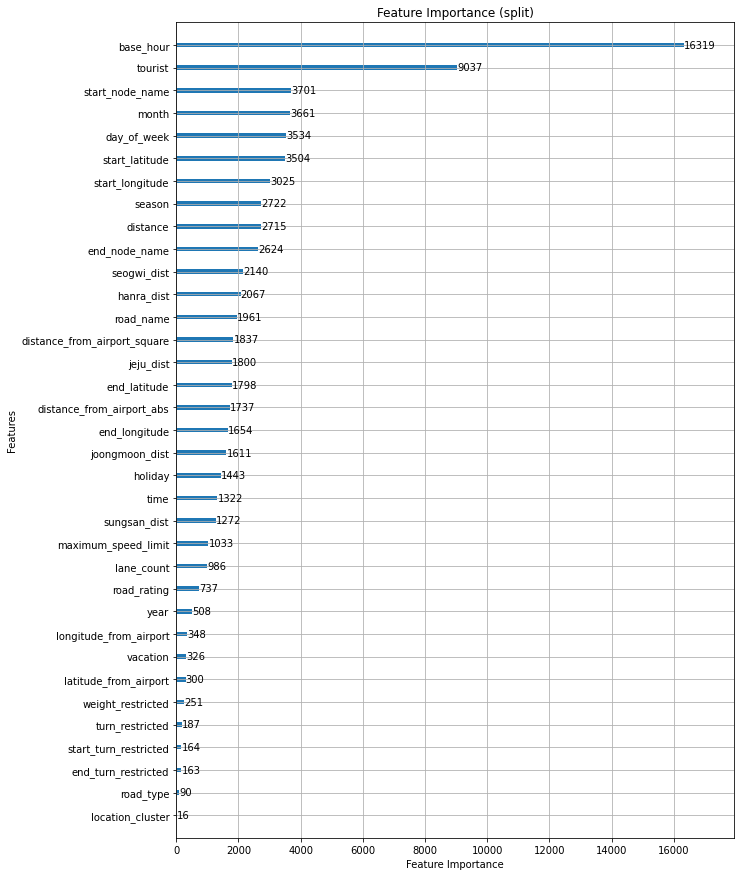

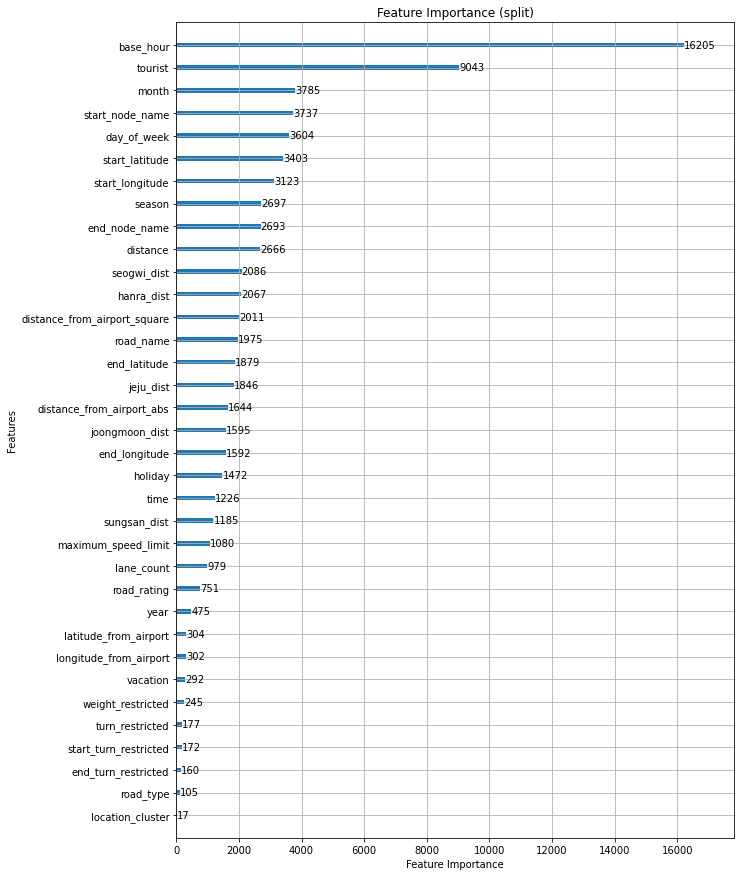

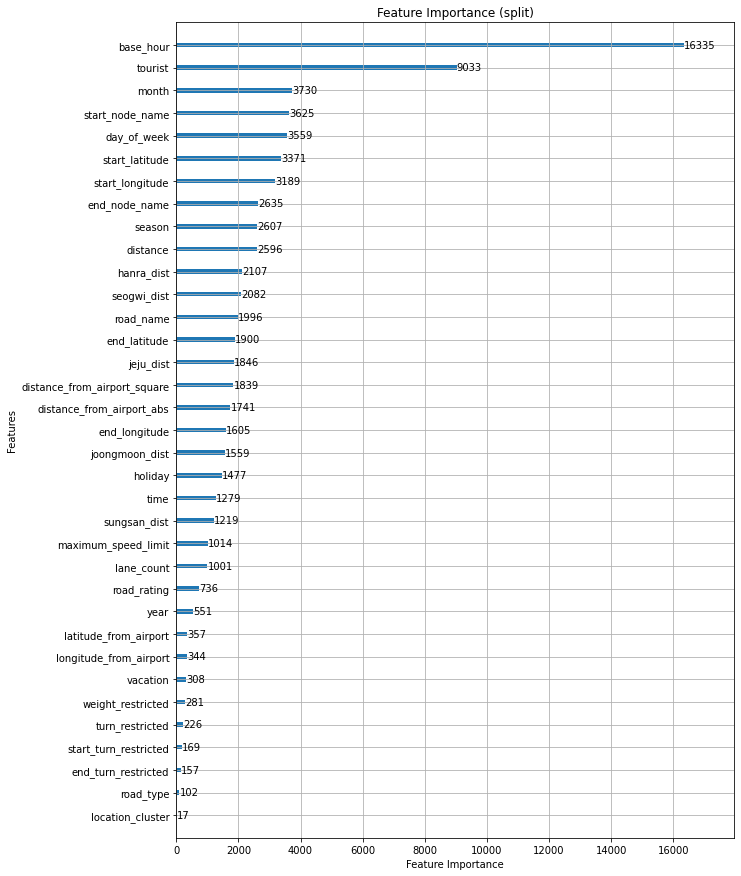

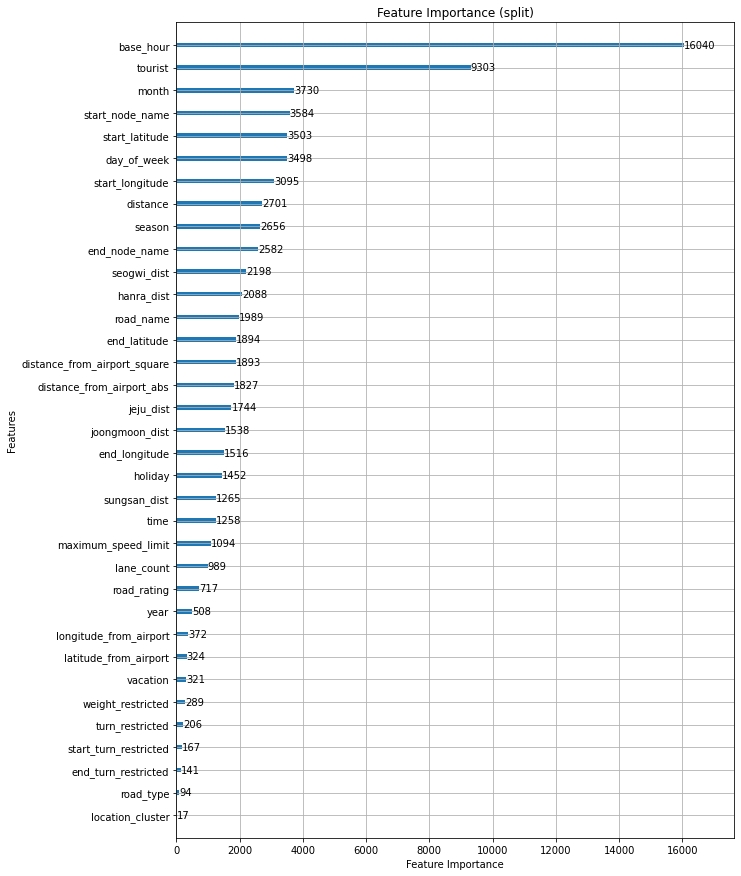

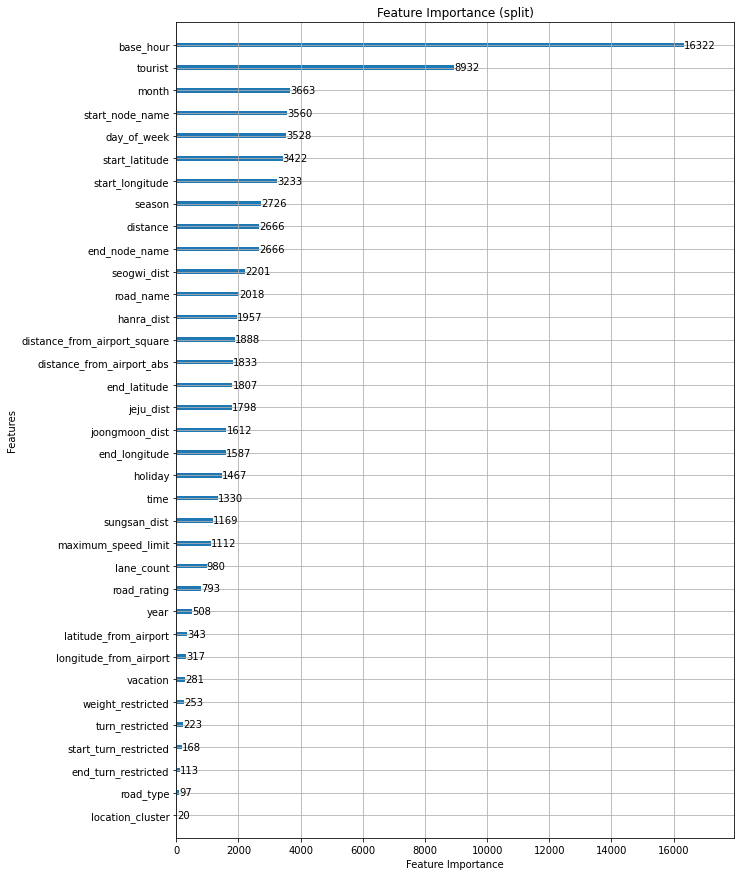

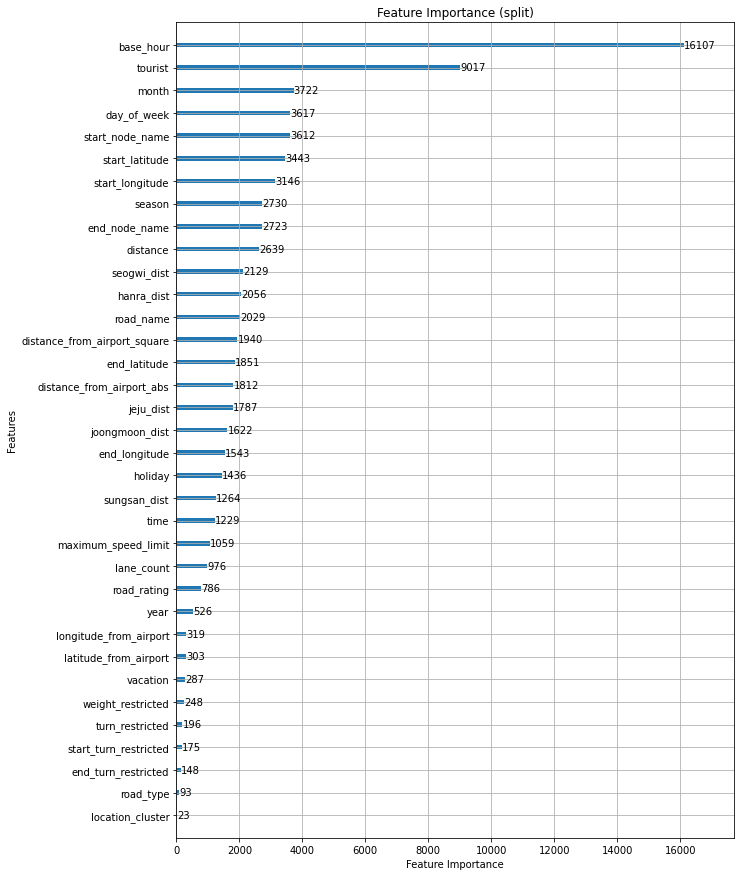

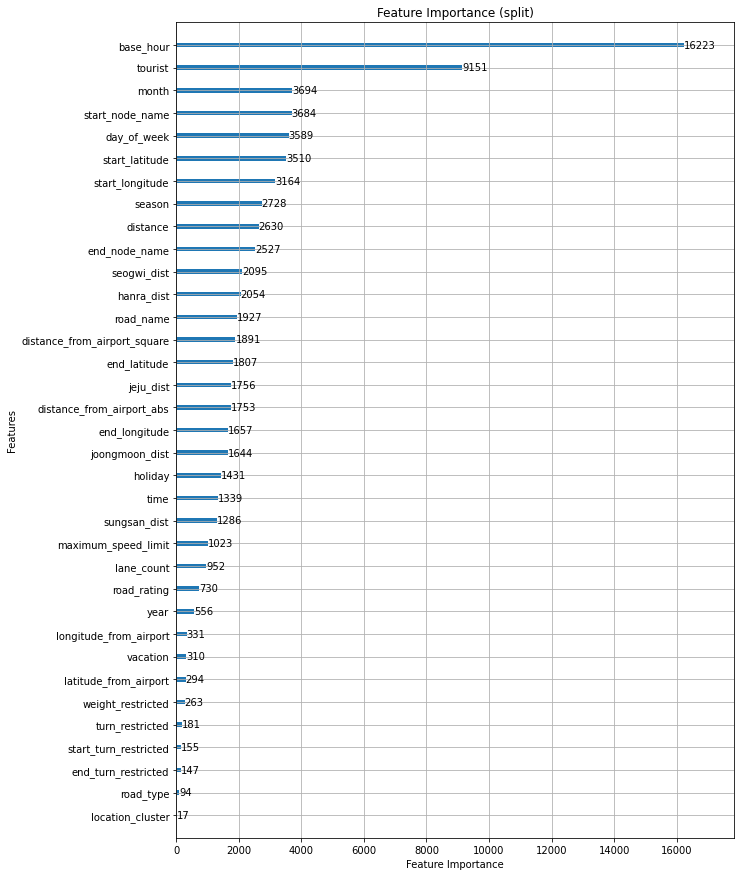

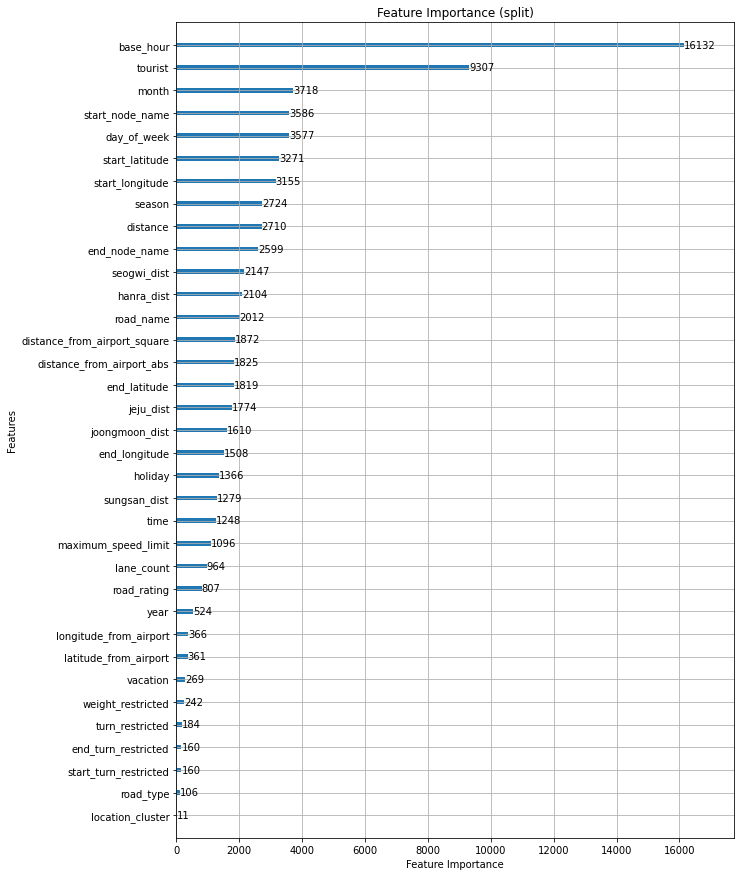

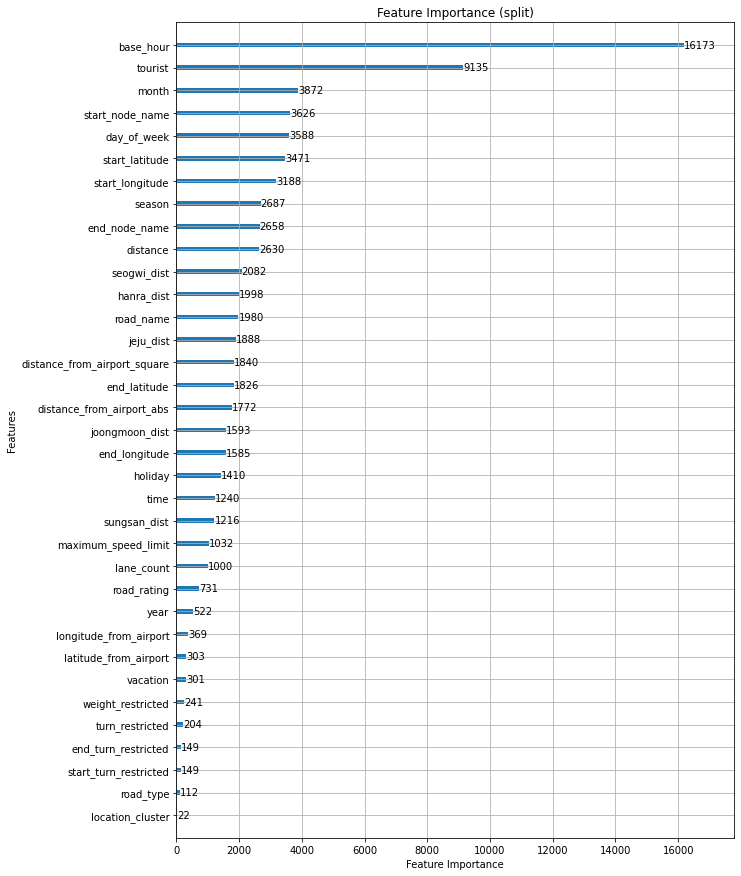

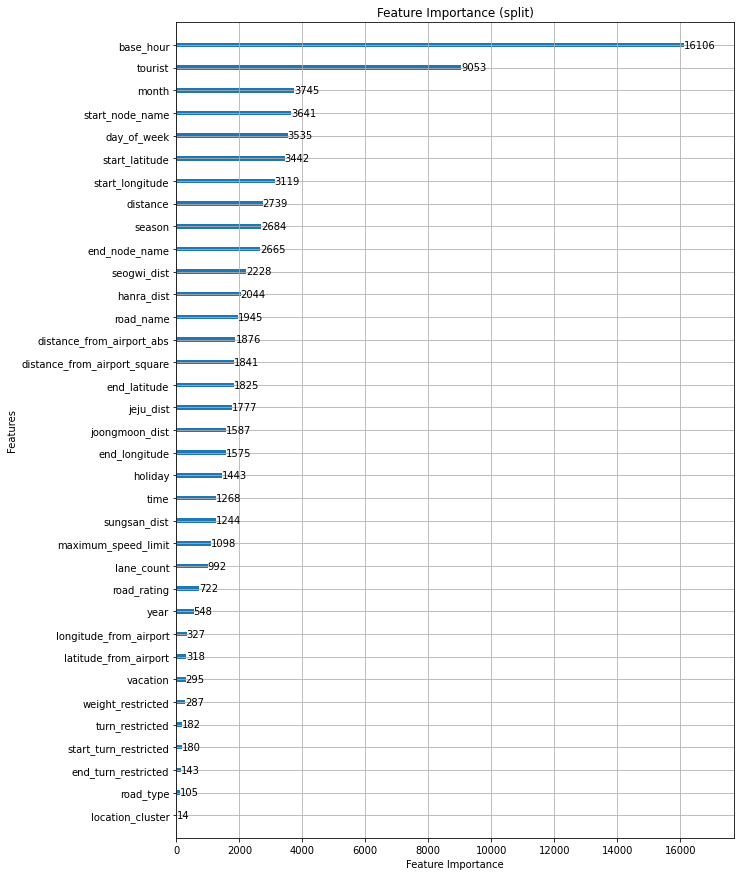

In [ ]:
# LGBM모델 SPLIT 중요도
import lightgbm as lgb

FEATURES = train_prep.drop('target',axis=1).columns

for fold in range(10):

  fig, ax = plt.subplots(figsize=(10, 15))
  ax = lgb.plot_importance(lgbm_models[fold], max_num_features=len(FEATURES), importance_type='split',ax=ax)

  ax.set(title=f'Feature Importance (split)',
    xlabel='Feature Importance',
    ylabel='Features')

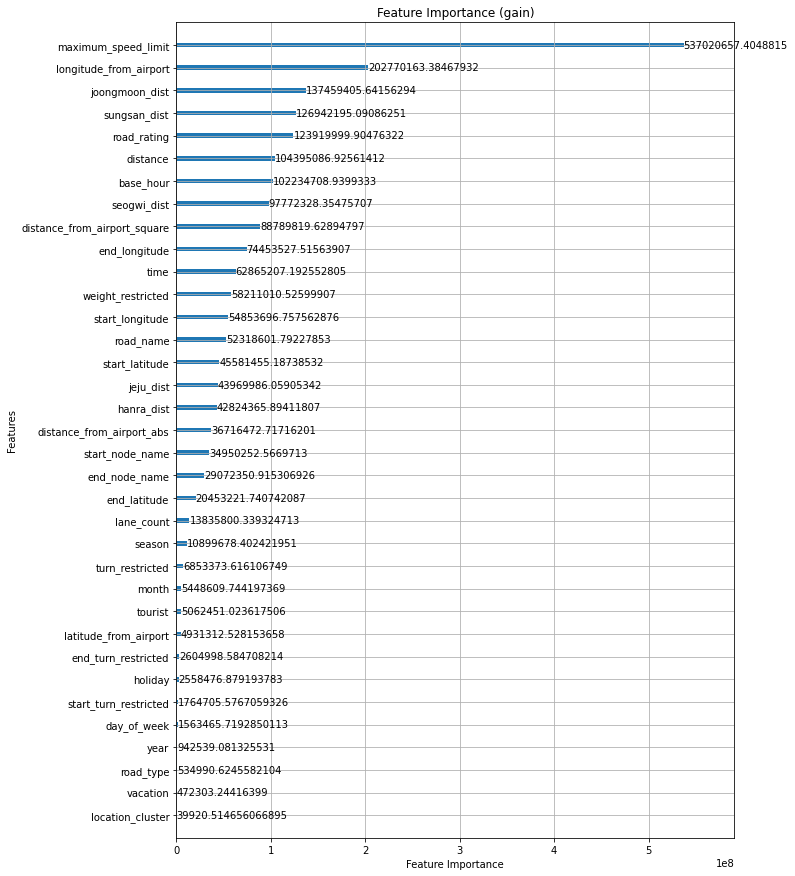

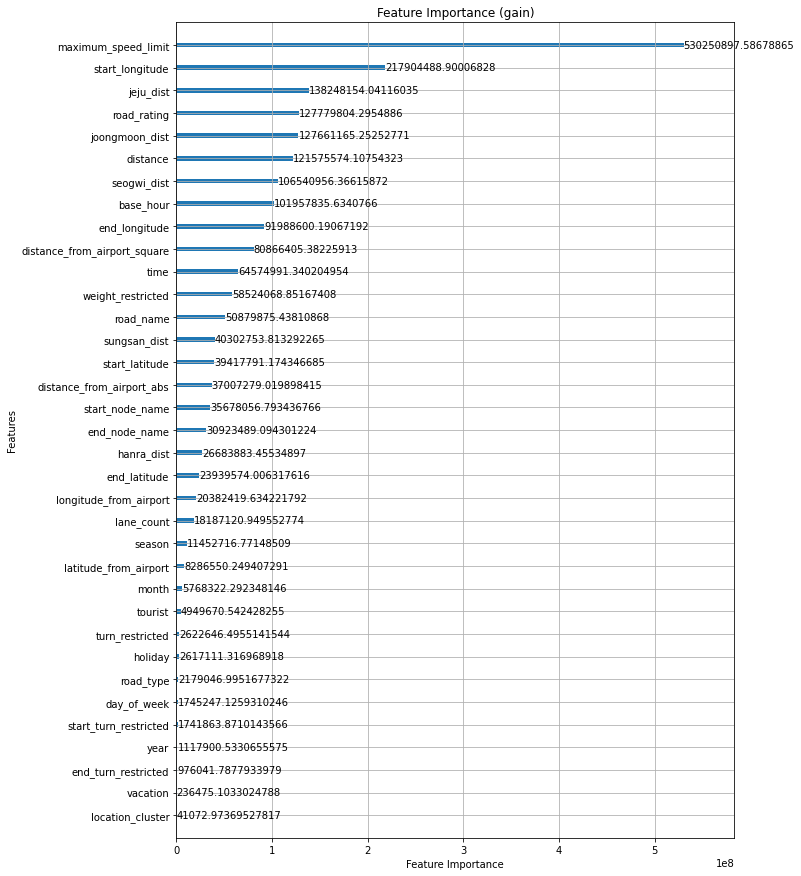

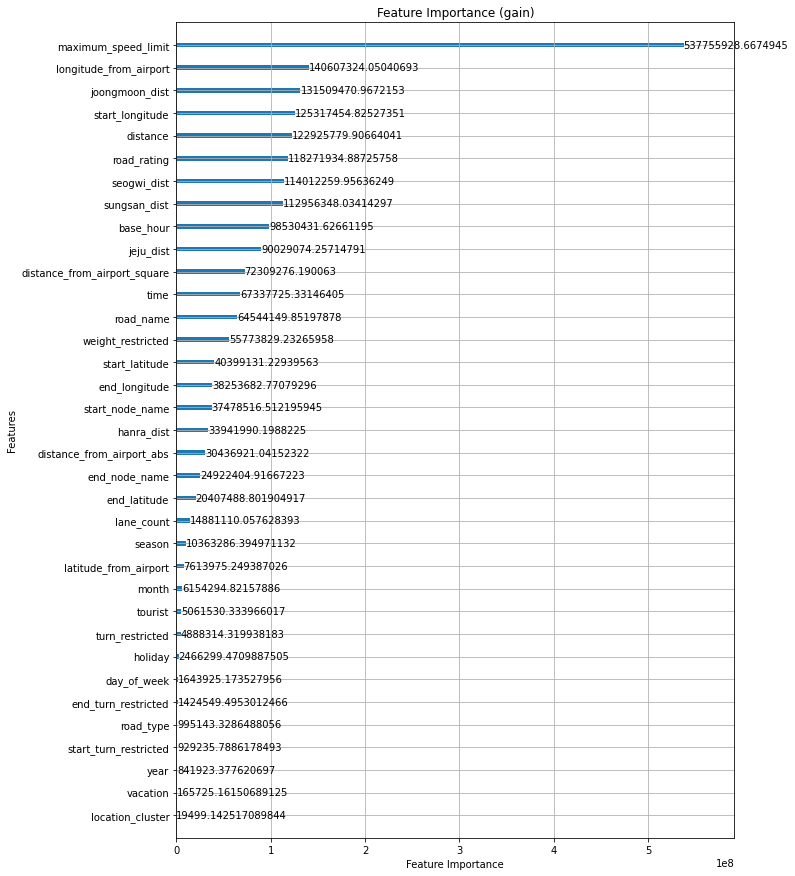

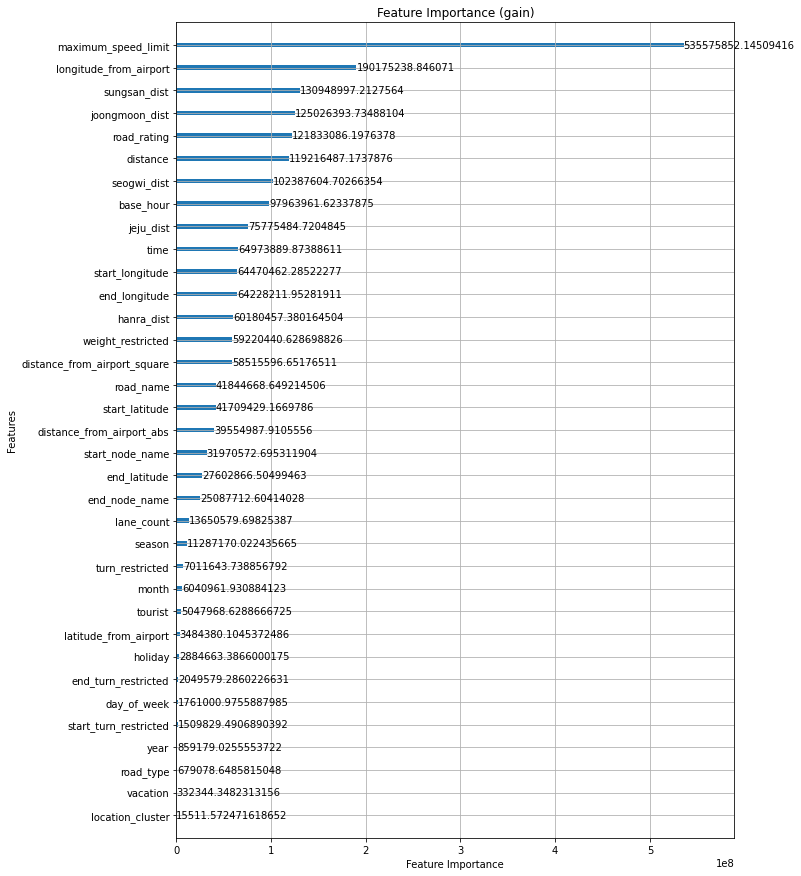

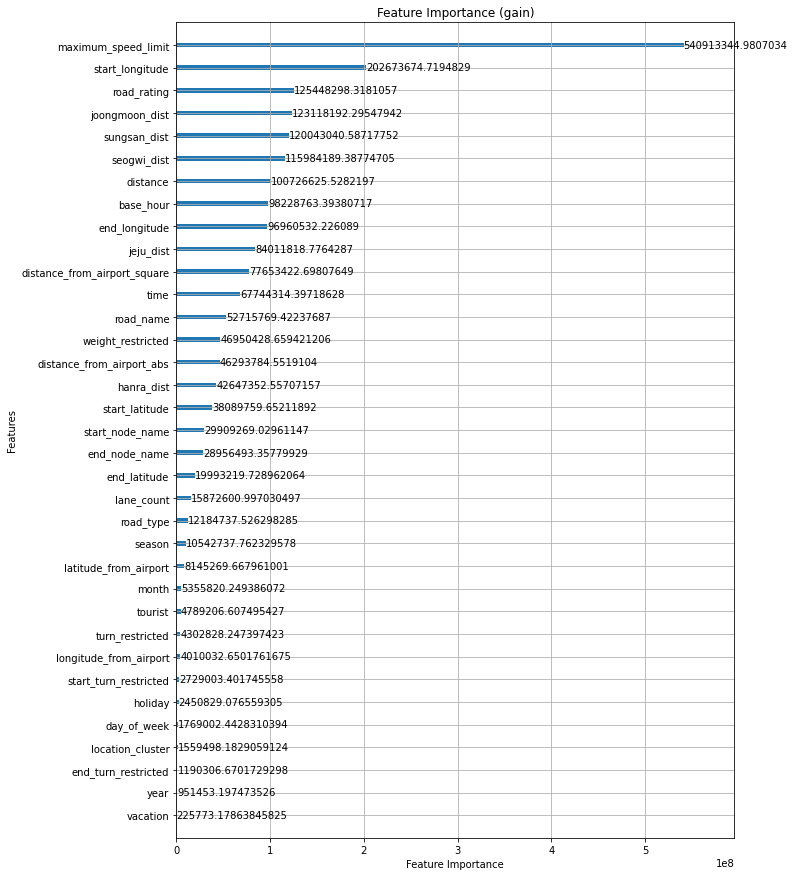

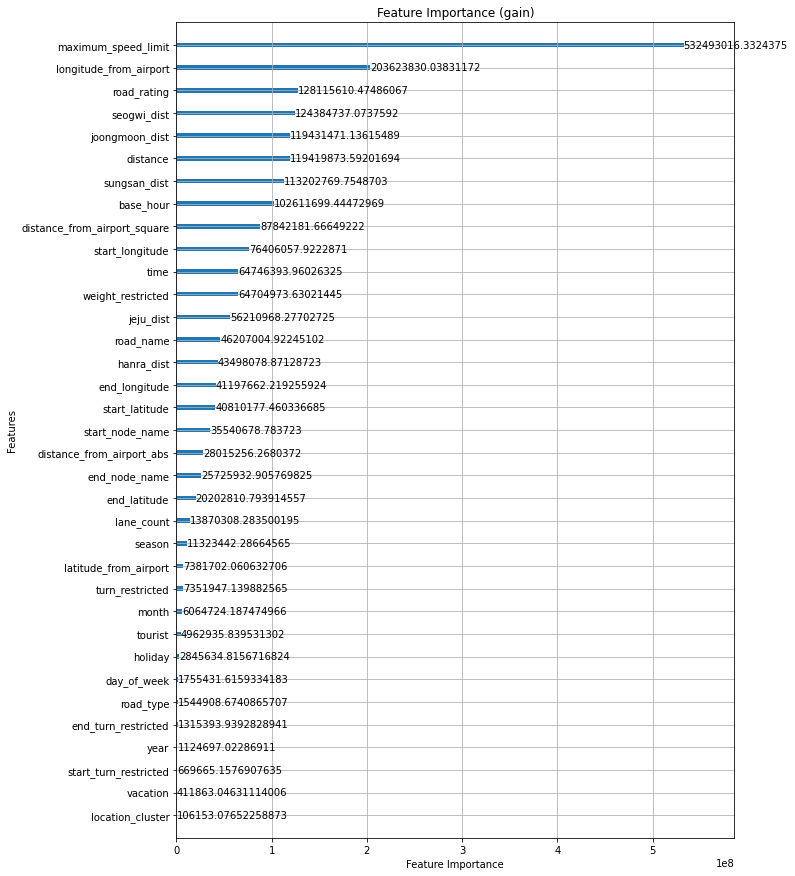

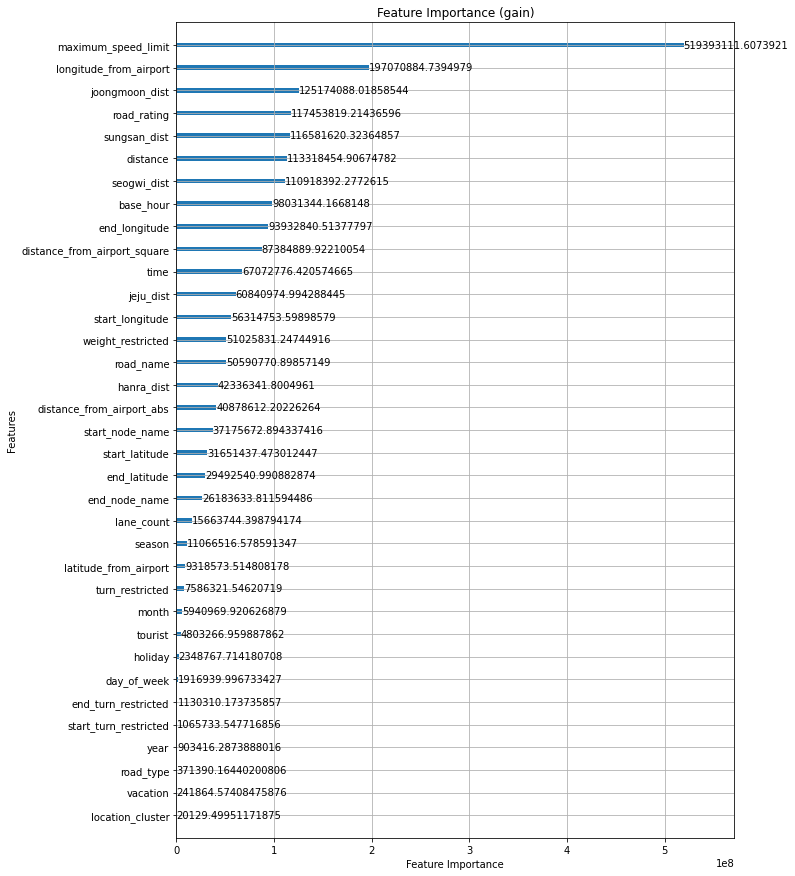

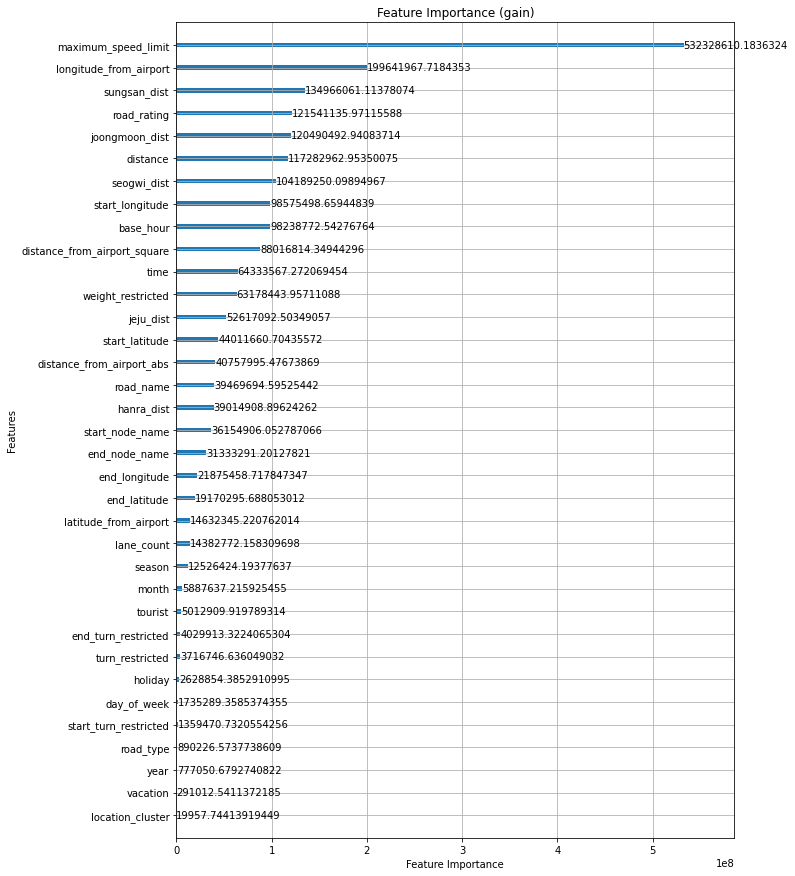

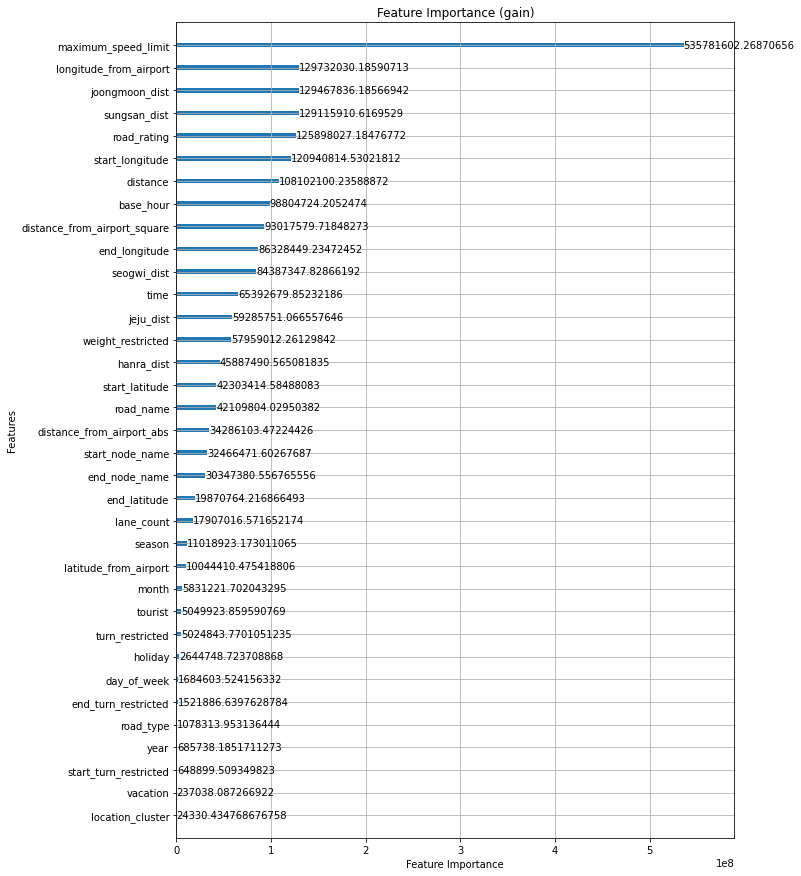

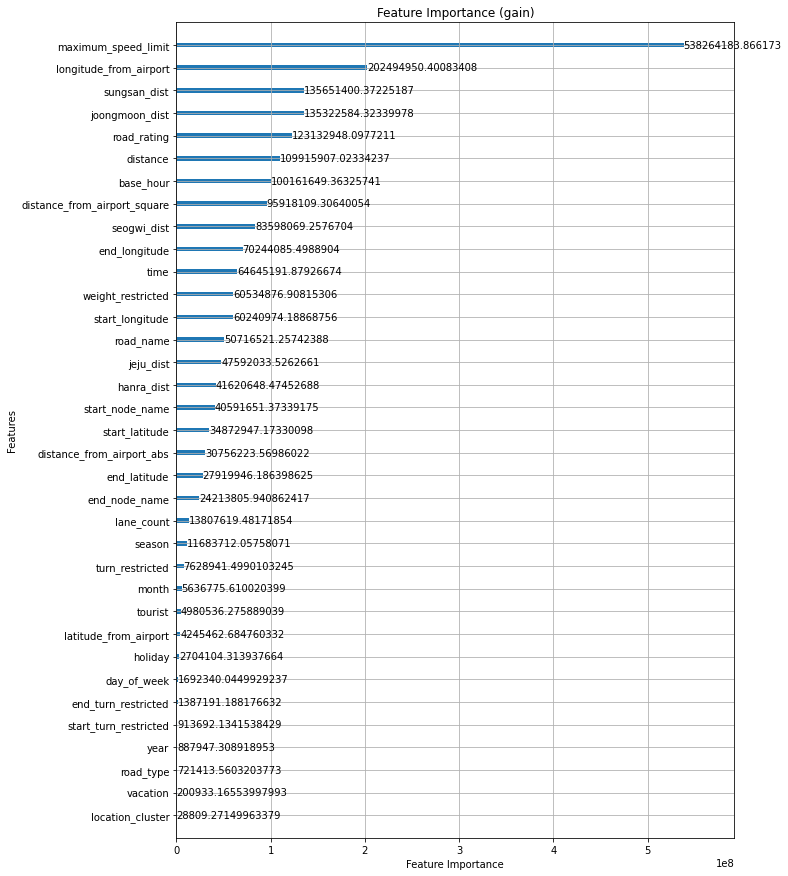

In [ ]:
# LGBM모델 GAIN 중요도
import lightgbm as lgb

FEATURES = train_prep.drop('target',axis=1).columns

for fold in range(10):

  fig, ax = plt.subplots(figsize=(10, 15))
  ax = lgb.plot_importance(lgbm_models[fold], max_num_features=len(FEATURES), importance_type='gain',ax=ax)

  ax.set(title=f'Feature Importance (gain)',
    xlabel='Feature Importance',
    ylabel='Features')

##Submission

In [ ]:
zeros = np.zeros((291241, 10), dtype=float)
test_predict_df = pd.DataFrame(zeros)

for i in range(10):
  test_predict_df[i] = lgbm_models[i].predict(test_prep)

test_predict_df

,0,1,2,3,4,5,6,7,8,9
0,25.028251,25.028908,25.247810,25.866114,25.431331,25.852939,25.738684,25.544314,25.304029,25.179763
1,43.614016,43.091013,43.343477,43.027293,43.572362,42.797270,43.075435,43.264495,43.674685,43.395287
2,66.239231,65.951247,65.491617,65.345328,65.957340,65.415009,64.752388,65.401076,64.775756,65.709993
3,38.996257,38.660094,39.109672,39.276716,38.253872,38.827582,38.793586,39.764526,38.632802,39.261292
4,43.454655,42.778614,43.047625,43.008204,43.071724,43.750576,42.981239,42.661882,43.266898,43.317169
...,...,...,...,...,...,...,...,...,...,...
291236,47.306420,47.581759,47.129036,47.242355,47.645544,47.165201,47.923678,47.594886,46.438782,47.490607
291237,52.818296,52.186412,52.011665,51.638545,51.683752,52.006030,52.043246,52.631040,51.831187,52.361858
291238,23.188244,22.316229,23.246890,22.558687,22.364322,22.439683,22.492045,22.412962,22.461929,23.318785
291239,22.313757,23.490817,22.940261,23.450292,22.219272,23.118322,23.850011,22.654045,22.615415,21.503333


In [ ]:
sample_submission = pd.read_csv(PATH+"/sample_submission.csv")

sample_submission['target'] = test_predict_df.mean(axis=1)
sample_submission

,id,target
0,TEST_000000,25.422214
1,TEST_000001,43.285533
2,TEST_000002,65.503899
3,TEST_000003,38.957640
4,TEST_000004,43.133859
...,...,...
291236,TEST_291236,47.351827
291237,TEST_291237,52.121203
291238,TEST_291238,22.679978
291239,TEST_291239,22.815552


In [ ]:
 #소수점이 0.3이하일 때 내림, 0.7 이상일 때 올림
sample_submission['decimal'] = sample_submission['target'].astype(str).str.split('.').str[1]
sample_submission['decimal'] = sample_submission['decimal'].astype(str).str[0].astype(int)
sample_submission.loc[sample_submission['decimal'] < 4,'target']= np.floor(sample_submission['target'])
sample_submission.loc[sample_submission['decimal'] > 6,'target']= np.ceil(sample_submission['target'])
sample_submission = sample_submission.drop(columns=['decimal'], axis = 1)

In [ ]:
sample_submission

,id,target
0,TEST_000000,25.422214
1,TEST_000001,43.000000
2,TEST_000002,65.503899
3,TEST_000003,39.000000
4,TEST_000004,43.000000
...,...,...
291236,TEST_291236,47.000000
291237,TEST_291237,52.000000
291238,TEST_291238,22.679978
291239,TEST_291239,23.000000


In [ ]:
sample_submission.to_csv("./submission_final.csv", index = False)